## Análise estatística
### Indicações de Soluções das Atividades de Aprofundamento
### Explorando a Base de Dados Diamonds do pacote ggplot2

#### Leitura dos dados

In [1]:
# Bibliotecas
library(ggplot2)
library(ggpubr)
library(skimr)

In [2]:
data(diamonds)
diamantes <- diamonds

#### Qual é a estrutura do conjunto de dados “diamantes”?

In [3]:
str(diamantes)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


O conjunto de dados diamantes possui 10 colunas (variáveis) e 53940 linhas (observações). As colunas carat, depth, table, x, y e z são de valores numéricos, as colunas cut, color e clarity possui atributos ordinais com, respectivamente, 5, 7 e 8 níveis de classificação. A coluna price apresenta valores inteiros.

Os nomes das colunas já estão em um formato adequado para a análise, sem espaços e sem caracteres especiais.

#### Explore a parte inicial e a final do conjunto de dados

In [4]:
head(diamantes)
tail(diamantes)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.72,Premium,D,SI1,62.7,59,2757,5.69,5.73,3.58
0.72,Ideal,D,SI1,60.8,57,2757,5.75,5.76,3.50
0.72,Good,D,SI1,63.1,55,2757,5.69,5.75,3.61
0.70,Very Good,D,SI1,62.8,60,2757,5.66,5.68,3.56
0.86,Premium,H,SI2,61.0,58,2757,6.15,6.12,3.74
0.75,Ideal,D,SI2,62.2,55,2757,5.83,5.87,3.64


Os dados iniciais e finais estão em ordem, não temos comentários após o final dos dados e os valores estão dentro da estrutura esperada.

#### Faça alguns sumários estatísticos para entender melhor a base de dados.

In [5]:
# Função para cálculo de moda
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [6]:
# Função para cálculo dos valores estatístivos numéricos
getvaluesnum <- function(v) {
    print(paste("Média: ",mean(v)))
    print(paste("Mediana: ",median(v)))
    print(paste("Desvio padrão:", sd(v)))
    print(paste("Variância:", var(v)))
    print(paste("Moda:", getmode(v)))

    print("Quartis:")
    quantile(v)
}

In [7]:
getvaluesnum(diamantes$carat)

[1] "Média:  0.797939747868001"
[1] "Mediana:  0.7"
[1] "Desvio padrão: 0.474011244405418"
[1] "Variância: 0.224686659822773"
[1] "Moda: 0.3"
[1] "Quartis:"


0%  25%  50%  75% 100% 
0.20 0.40 0.70 1.04 5.01

In [8]:
getvaluesnum(diamantes$depth)

[1] "Média:  61.749404894327"
[1] "Mediana:  61.8"
[1] "Desvio padrão: 1.43262131883366"
[1] "Variância: 2.0524038431767"
[1] "Moda: 62"
[1] "Quartis:"


0%  25%  50%  75% 100% 
43.0 61.0 61.8 62.5 79.0

In [9]:
getvaluesnum(diamantes$table)

[1] "Média:  57.457183908046"
[1] "Mediana:  57"
[1] "Desvio padrão: 2.23449056282132"
[1] "Variância: 4.99294807533755"
[1] "Moda: 56"
[1] "Quartis:"


0%  25%  50%  75% 100% 
  43   56   57   59   95

In [10]:
getvaluesnum(diamantes$x)

[1] "Média:  5.73115721171672"
[1] "Mediana:  5.7"
[1] "Desvio padrão: 1.12176074679249"
[1] "Variância: 1.25834717304445"
[1] "Moda: 4.37"
[1] "Quartis:"


0%   25%   50%   75%  100% 
 0.00  4.71  5.70  6.54 10.74

In [11]:
getvaluesnum(diamantes$y)

[1] "Média:  5.73452595476455"
[1] "Mediana:  5.71"
[1] "Desvio padrão: 1.14213467412356"
[1] "Variância: 1.30447161383532"
[1] "Moda: 4.34"
[1] "Quartis:"


0%   25%   50%   75%  100% 
 0.00  4.72  5.71  6.54 58.90

In [12]:
getvaluesnum(diamantes$z)

[1] "Média:  3.53873377827215"
[1] "Mediana:  3.53"
[1] "Desvio padrão: 0.705698846949994"
[1] "Variância: 0.498010862586551"
[1] "Moda: 2.7"
[1] "Quartis:"


0%   25%   50%   75%  100% 
 0.00  2.91  3.53  4.04 31.80

In [13]:
getvaluesnum(diamantes$price)

[1] "Média:  3932.79972191324"
[1] "Mediana:  2401"
[1] "Desvio padrão: 3989.43973814638"
[1] "Variância: 15915629.4243014"
[1] "Moda: 605"
[1] "Quartis:"


0%      25%      50%      75%     100% 
  326.00   950.00  2401.00  5324.25 18823.00

In [14]:
getmode(diamantes$cut)

[1] Ideal
Levels: Fair < Good < Very Good < Premium < Ideal

In [15]:
getmode(diamantes$color)

[1] G
Levels: D < E < F < G < H < I < J

In [16]:
getmode(diamantes$clarity)

[1] SI1
Levels: I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF

#### A saída da função summary() está de acordo com a descrição mostrada anteriormente?

In [17]:
summary(diamantes)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

Os valores da função summary estão compatíveis com os valores calculados anteriormente, e dentro do esperado de cada variável conforme a análise anterior.

#### Explore a variável price, seguindo o modelo de exploração

In [18]:
if (knitr::is_latex_output()) {
     # pdf output
     skim_without_charts(diamonds$price)
} else {
     skim(diamonds$price)
}

── Data Summary ────────────────────────
                           Values        
Name                       diamonds$price
Number of rows             53940         
Number of columns          1             
_______________________                  
Column type frequency:                   
  numeric                  1             
________________________                 
Group variables            None          

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean    sd    p0   p25   p50   p75
1 data                  0             1 3933. 3989.   326   950  2401 5324.
   p100 hist 
1 18823 ▇▂▁▁▁


#### Veja a distribuição da variável (histograma); observe a faixa de valores da variável e também.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



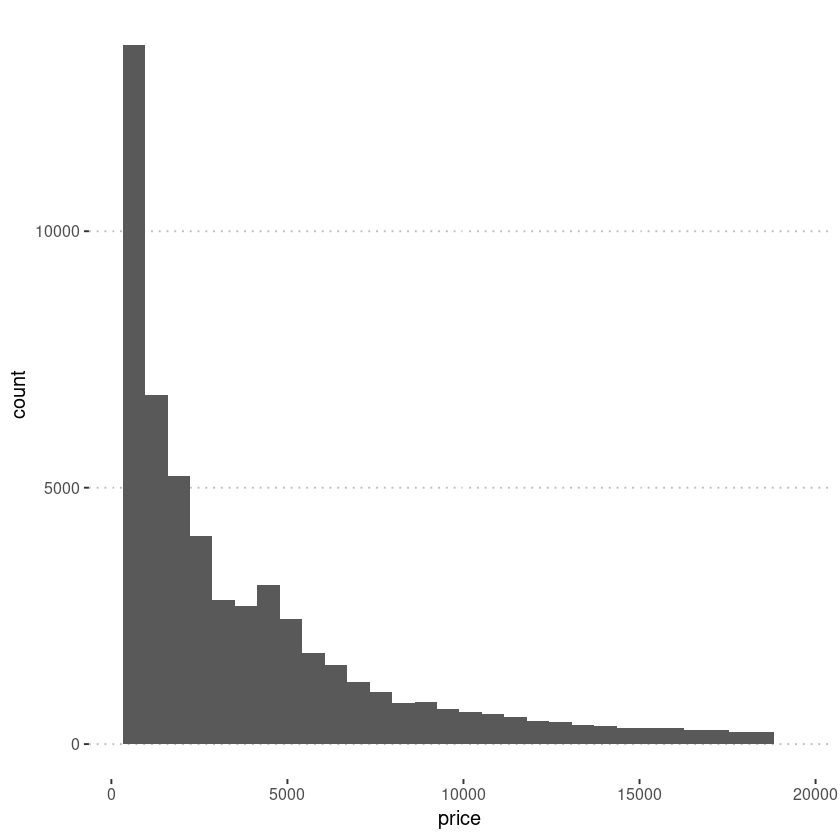

In [19]:
Price <- ggplot(data = diamantes) + geom_histogram(aes(price)) + labs_pubr() + theme_pubclean()
Price

Vemos uma grande concentração da distribuição dos preços nos valores mais baixos, em uma distribuição de cauda. As maiores concentrações estão em valores menores do que 5000.

#### Explore também as variáveis carat, cut, color, clarity, x, y, z, depth e table, seguindo o modelo de exploração.

In [20]:
if (knitr::is_latex_output()) {
     # pdf output
     skim_without_charts(diamonds, - price)
} else {
     skim(diamonds, - price)
}

── Data Summary ────────────────────────
                           Values  
Name                       diamonds
Number of rows             53940   
Number of columns          10      
_______________________            
Column type frequency:             
  factor                   3       
  numeric                  6       
________________________           
Group variables            None    

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 cut                   0             1 TRUE           5
2 color                 0             1 TRUE           7
3 clarity               0             1 TRUE           8
  top_counts                                   
1 Ide: 21551, Pre: 13791, Ver: 12082, Goo: 4906
2 G: 11292, E: 9797, F: 9542, H: 8304          
3 SI1: 13065, VS2: 12258, SI2: 9194, VS1: 8171 

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



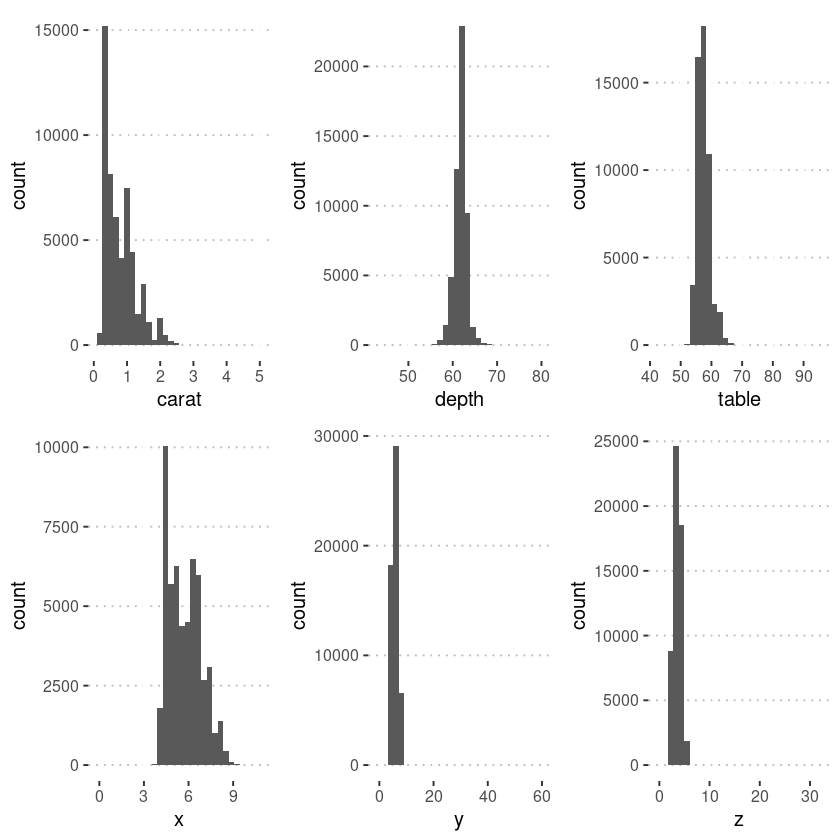

In [21]:
h_carat <- ggplot(data = diamantes) + geom_histogram(aes(carat)) + labs_pubr() + theme_pubclean()
h_depth <- ggplot(data = diamantes) + geom_histogram(aes(depth)) + labs_pubr() + theme_pubclean()
h_table <- ggplot(data = diamantes) + geom_histogram(aes(table)) + labs_pubr() + theme_pubclean()
h_x <- ggplot(data = diamantes) + geom_histogram(aes(x)) + labs_pubr() + theme_pubclean()
h_y <- ggplot(data = diamantes) + geom_histogram(aes(y)) + labs_pubr() + theme_pubclean()
h_z <- ggplot(data = diamantes) + geom_histogram(aes(z)) + labs_pubr() + theme_pubclean()


ggarrange(ncol = 3, nrow = 2, h_carat, h_depth, h_table, h_x, h_y, h_z) 

Pelos histogramas conseguimos ver:
* Na variável carat vemos que mais da metade dos diamantes tem um peso menor do que 2
* Na variável depth vemos o perncetual de profundidade está bastante concentrado entre 60 e 65
* Na variável table temos que o tamanho do topo do diamante está concentrado entre 50 e 65
* Na variável x temos que o comprimento está concentrado entre 4 e 8mm
* Na variável y temos que a largura está concentrada entre 0 e 10mm
* Na variável z temos que a profundidade está concentrada entre 2 e 6mm

#### Crie boxplots para as variáveis numéricas; veja se existem dados anormais (outliers).

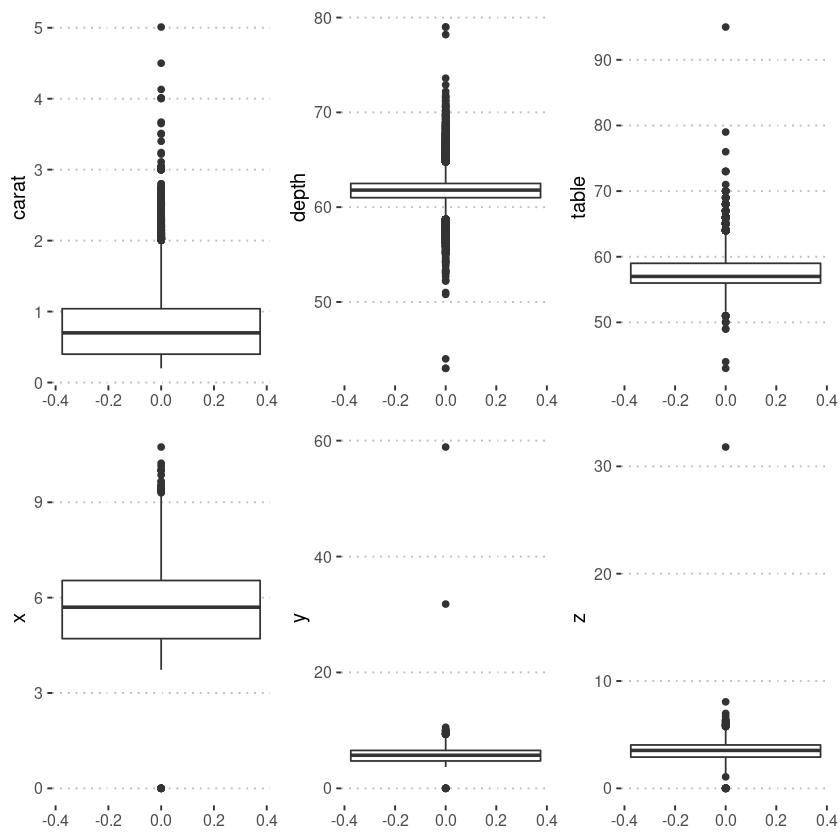

In [22]:
b_carat <- ggplot(data = diamantes) + geom_boxplot(aes(y=carat)) + labs_pubr() + theme_pubclean()
b_depth <- ggplot(data = diamantes) + geom_boxplot(aes(y=depth)) + labs_pubr() + theme_pubclean()
b_table <- ggplot(data = diamantes) + geom_boxplot(aes(y=table)) + labs_pubr() + theme_pubclean()
b_x <- ggplot(data = diamantes) + geom_boxplot(aes(y=x)) + labs_pubr() + theme_pubclean()
b_y <- ggplot(data = diamantes) + geom_boxplot(aes(y=y)) + labs_pubr() + theme_pubclean()
b_z <- ggplot(data = diamantes) + geom_boxplot(aes(y=z)) + labs_pubr() + theme_pubclean()

ggarrange(ncol = 3, nrow = 2, b_carat, b_depth, b_table, b_x, b_y, b_z) 

Pelos gráficos conseguimos ver que temos muitos outliers nas medições, causadas pela alta concetração de amostras em torno de poucos valores, conforme visualizado nos histogramas.

#### Utilize as variáveis categóricas para fazer o facetamento dos dados, mostrando alguns gráficos com 2 ou mais variáveis contínuas lado a lado.

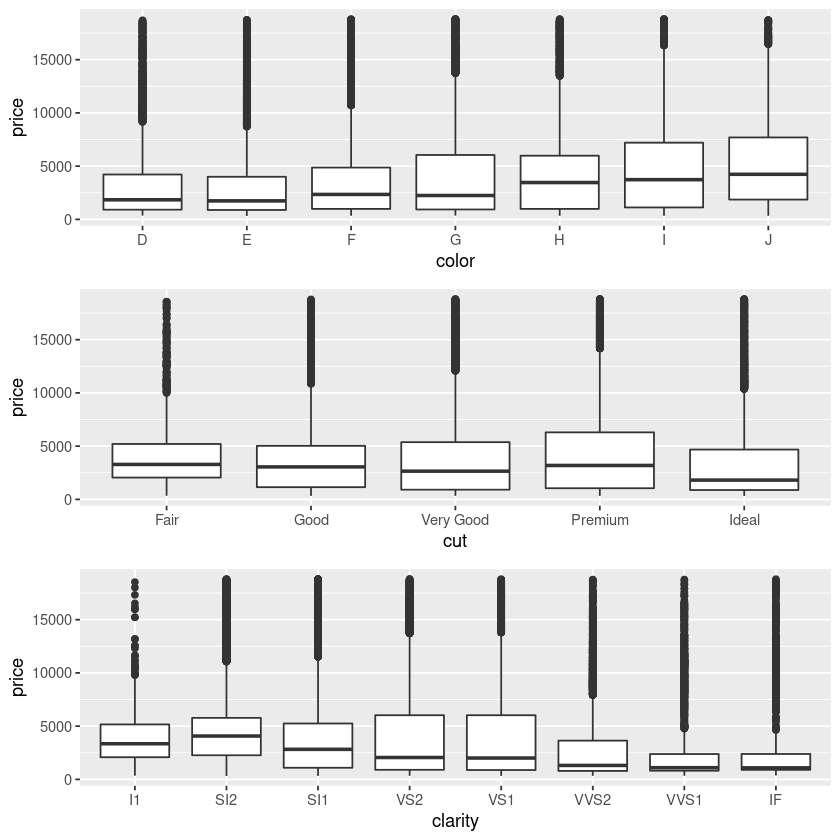

In [23]:
clpr <- ggplot(data = diamonds, aes(x = color, y = price)) + geom_boxplot()
cupr <- ggplot(data = diamonds, aes(x = cut, y = price)) + geom_boxplot()
crpr <- ggplot(data = diamonds, aes(x = clarity, y = price)) + geom_boxplot()

ggarrange(ncol = 1, nrow = 3, clpr, cupr, crpr) 